
Original dataset:

   Matematicas  Sociales  Fisica  Lenguage  Qimica  Ciudadanas  Y
0           44        75      60        76      40          73  0
1           45        64      75        64      45          64  1
2           73        60      72        57      58          67  0
3           56        69      60        70      46          69  1
4           39        49      72        44      41          63  0

Principal Components:

[[-0.09 -0.59 -0.01 -0.79 -0.05 -0.11]
 [ 0.76 -0.06  0.39 -0.06  0.5  -0.08]
 [ 0.47 -0.01 -0.88 -0.04 -0.03  0.05]
 [ 0.03  0.13  0.07 -0.23  0.04  0.96]
 [-0.43 -0.   -0.26  0.    0.86  0.  ]
 [ 0.   -0.8   0.    0.56 -0.    0.24]]

Explained Variance Ratio:

[3.82e-01 2.74e-01 2.35e-01 1.09e-01 7.06e-05 5.77e-05]

Dataset transformed with 2 Principal Components:

         PC1        PC2  Y
0 -13.354426  -4.418524  0
1   3.236343   6.765300  1
2   7.879770  33.917428  0
3  -5.899215   8.786228  1
4  28.788285   1.153513  0


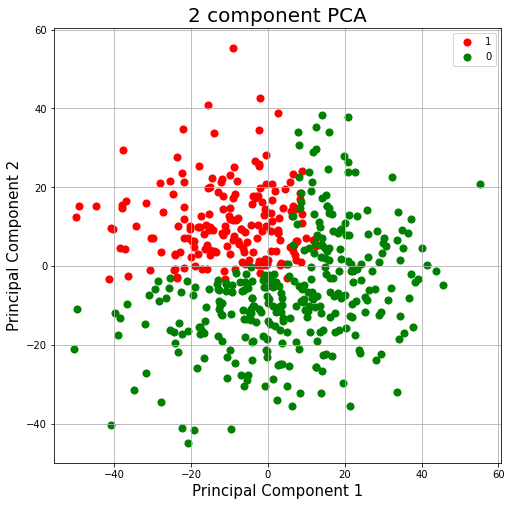

In [ ]:
#Pandas: work with datasets
import pandas as pd

#Numpy: powerful mathematical library
import numpy as np
from numpy import linalg as LA

#sklearn: machine learning library
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Read dataset
saber11 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRLmWiB3D_8SpfOQcn7GS68A8xgYeVQEchmJQhEeFutoPon5XIFuL2Kg2KkEsjUmw/pub?gid=1924560902&single=true&output=csv')
print("\nOriginal dataset:\n")
print(saber11.head())

y = saber11['Y']
x = saber11.drop(['Y'], axis=1)

#x = StandardScaler().fit_transform(x)
#print("\nConjunto de datos normalizado:\n")
#print(x[0:5])

#PCA
#pca = PCA(n_components=2)
pca = PCA()
principalComponents = pca.fit_transform(x)

np.set_printoptions(precision=2)

print("\nPrincipal Components:\n")
print(pca.components_)

#print(pca.singular_values_)
#print(pca.explained_variance_)

print("\nExplained Variance Ratio:\n")
print(pca.explained_variance_ratio_)

#Create a new dataframe with 2 columns, PC1 y PC2
principalDf = pd.DataFrame(data = principalComponents[:,0:2], columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, y], axis = 1)

print("\nDataset transformed with 2 Principal Components:\n")
print(finalDf.head())

#Plot Principal Components
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target    
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
